In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
%matplotlib inline

In [3]:
DATA_DIR = './cell_images/cell_images/'
SIZE = 64
dataset = []
label = []

In [54]:
# parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')
# for i, image_name in enumerate(parasitized_images):
#     if (image_name.split('.')[1] == 'png'):
#         image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
#         image = Image.fromarray(image, 'RGB')
#         image = cv2.resize(image, (SIZE, SIZE))
#         dataset.append(image)
#         label.append(0)

In [55]:
# uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')
# for i, image_name in enumerate(uninfected_images):
#     if (image_name.split('.')[1] == 'png'):
#         image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
#         image = np.array(image)
#         image = cv2.resize(image, (SIZE, SIZE)).flatten()
#         dataset.append(np.array(image))
#         label.append(1)
image[0]

TypeError: 'Image' object does not support indexing

0
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
from keras.utils import to_categorical
from keras.preprocessing import image

Using TensorFlow backend.
c:\users\subhanee\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\subhanee\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\subhanee\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",

In [6]:
parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):
    if (image_name.split('.')[1] == 'png'):
        img = image.load_img(DATA_DIR + 'Parasitized/' + image_name, target_size=(SIZE,SIZE,1), grayscale=False)
        img = image.img_to_array(img)
#         img /= 255
        dataset.append(img)
        label.append(0)
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        img = image.load_img(DATA_DIR + 'Uninfected/' + image_name, target_size=(SIZE,SIZE,1), grayscale=False)
        img = image.img_to_array(img)
#         img /= 255
        dataset.append(img)
        label.append(1)


In [64]:
# parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')
# for i, image_name in enumerate(parasitized_images):
#     if (image_name.split('.')[1] == 'png'):
#         img = image.load_img(DATA_DIR + 'Parasitized/' + image_name, target_size=(28,28,1), grayscale=True)
#         img = image.img_to_array(img)
#         img /= 255
#         dataset.append(img)
#         label.append(0)
# uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')
# for i, image_name in enumerate(uninfected_images):
#     if (image_name.split('.')[1] == 'png'):
#         img = image.load_img(DATA_DIR + 'Uninfected/' + image_name, target_size=(28,28,1), grayscale=True)
#         img = image.img_to_array(img)
#         img /= 255
#         dataset.append(img)
#         label.append(1)


In [7]:
X = np.array(dataset)
y = np.array(label)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [9]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [12]:
# X_train.shape

(22046, 64, 64, 3)

In [15]:
X_train = X_train.reshape(22046, 3*SIZE*SIZE)
X_test = X_test.reshape(5512, 3*SIZE*SIZE)


In [16]:
lm.fit(X_train, y_train)

MemoryError: Unable to allocate 2.02 GiB for an array with shape (22046, 12288) and data type float64

In [93]:
predictions = lm.predict(X_test)

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      2703
           1       0.65      0.67      0.66      2809

    accuracy                           0.65      5512
   macro avg       0.65      0.65      0.65      5512
weighted avg       0.65      0.65      0.65      5512



In [97]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [98]:
lin.fit(X_train, y_train)

LinearRegression()

In [99]:
predictlinear = lin.predict(X_test)

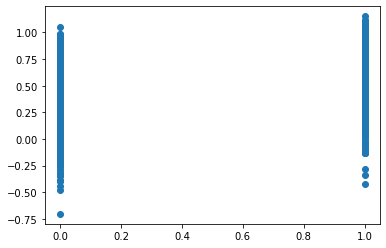

In [102]:
plt.scatter(y_test, predictlinear)

0